In [21]:
import tables
import hdf5_getters
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sqlite3
import gensim

In [6]:
conn = sqlite3.connect('file:mxm_dataset.db?mode=ro', uri=True)
curs = conn.cursor()
'''
tracks = dict()
for (word, track, count, word_id) in curs.execute("SELECT l.word, l.track_id, l.count, w.ROWID FROM lyrics l, words w WHERE w.word=l.word;"):
    if track in tracks:
        tracks[track].append((word_id, count))
    else:
        tracks[track] = [(word_id, count)]
        '''
words = dict()
for (word, word_id) in curs.execute("SELECT w.word, w.ROWID FROM words w"):
    words[word_id] = word

In [3]:
import pickle
with open('tracksBow.pickle','rb') as f:
    tracksbow = pickle.load(f)
with open('id2word.pickle','rb') as f:
    id2word = pickle.load(f)
nWords = len(id2word)
with open('tfidfVectors.pickle', 'rb') as f:
    tfidf = pickle.load(f)

In [32]:
h5 = hdf5_getters.open_h5_file_read(os.getcwd()+'/MillionSongSubset/data/A/A/A/TRAAAAW128F429D538.h5')
duration = hdf5_getters.get_duration(h5)
name = hdf5_getters.get_artist_name(h5)
terms = hdf5_getters.get_artist_terms(h5)
hotttnesss = hdf5_getters.get_song_hotttnesss(h5)
title = hdf5_getters.get_title(h5)
h5.close()
print(title)
print(name)
print(terms)
print(hotttnesss)

b"I Didn't Mean To"
b'Casual'
[b'hip hop' b'underground rap' b'g funk' b'alternative rap' b'gothic rock'
 b'west coast rap' b'rap' b'club dance' b'singer-songwriter' b'chill-out'
 b'underground hip hop' b'rock' b'gothic' b'san francisco bay area'
 b'indie' b'american' b'punk' b'california' b'industrial' b'new york'
 b'90s' b'latin' b'spanish' b'dark' b'ebm' b'underground' b'deathrock'
 b'west coast' b'san francisco' b'producer' b'oakland' b'catalan'
 b'barcelona' b'doomsdope' b'norcal' b'west coast hip hop'
 b'alternative rock']
0.602119989906


In [15]:
hot = np.zeros([10000])
j = 0
files = os.listdir(os.getcwd()+'/MillionSongSubset/data/A/A/A/')
for root, dirs, files in os.walk(os.getcwd()+'/MillionSongSubset/data/'):
    for f in files:
        if os.path.splitext(f)[1]==".h5":
            h5 = hdf5_getters.open_h5_file_read(os.path.join(root,f))
            nSongs = hdf5_getters.get_num_songs(h5)
            for i in range(nSongs):
                hot[j] = hdf5_getters.get_song_hotttnesss(h5, i)
                j = j+1
            h5.close()

/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:687: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= mn)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:688: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= mx)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/fujimca/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


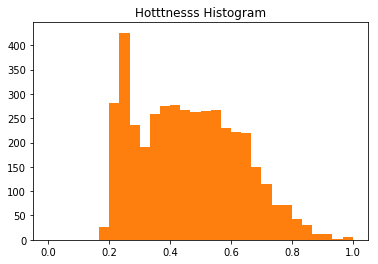

In [42]:
hotCounts = plt.hist(hot,'auto',(0.0001,1))
#plt.plot(edges[0:-1],hotCounts)
plt.title("Hotttnesss Histogram")
plt.show()

Use TF-IDF for lyrics

In [62]:
hotDict = dict()
songId2Ind = dict()
j = 0
for root, dirs, files in os.walk(os.getcwd()+'/MillionSongSubset/data/'):
    for f in files:
        if os.path.splitext(f)[1]==".h5":
            h5 = hdf5_getters.open_h5_file_read(os.path.join(root,f))
            nSongs = hdf5_getters.get_num_songs(h5)
            for i in range(nSongs):
                songid = hdf5_getters.get_track_id(h5, i)
                hotDict[songid.decode()] = hdf5_getters.get_song_hotttnesss(h5, i)
                songId2Ind[songid.decode()] = j
                j = j+1
            h5.close()

Create feature vector of 

In [ ]:
for root, dirs, files in os.walk(os.getcwd()+'/MillionSongSubset/data/'):
    for f in files:
        if os.path.splitext(f)[1]==".h5":
            h5 = hdf5_getters.open_h5_file_read(os.path.join(root,f))
            nSongs = hdf5_getters.get_num_songs(h5)
            for i in range(nSongs):
                songid = hdf5_getters.get_track_id(h5, i)
                hotDict[songid.decode()] = hdf5_getters.get_song_hotttnesss(h5, i)
            h5.close()

In [72]:
model = gensim.models.TfidfModel(tracks.values())

In [76]:
tfidf = dict()
for track_id in tracks:
    tfidf[track_id] = model[tracks[track_id]]

In [14]:
s1 = list(tfidf.values())[0]
for k in sorted(s1, key=lambda x: x[1], reverse=True):
    print(words[k[0]], k[1])

highest 0.309451741173
social 0.303252208996
captur 0.294501808126
order 0.251128320338
poor 0.224971947251
element 0.17191144062
wilder 0.171487532824
devast 0.171278082379
lifeless 0.168071481466
shark 0.167764976615
arrang 0.164445604049
leaf 0.161882572567
slice 0.157519696404
soil 0.152470657739
patienc 0.147279134037
ici 0.146692498335
fashion 0.140007955635
grant 0.138260773484
piti 0.138000331612
these 0.127934959469
resist 0.127562071386
tide 0.126222159825
season 0.124390515578
seed 0.123670766961
passion 0.118559754262
ignor 0.114004787256
grace 0.112091149168
somehow 0.11170952054
flesh 0.111165330339
worth 0.105028977751
river 0.1033867098
piec 0.100882738654
met 0.0973824758252
damn 0.0966802753213
pass 0.0804978570235
for 0.0788666414513
understand 0.0784219285356
someon 0.0760834545799
was 0.0724659302454
seem 0.0680819428329
de 0.0604141224455
like 0.0585093565718
we 0.0535264473592
i 0.0497405600644
been 0.04771966324
am 0.0463196485049
have 0.0445706246475
will 0.042

In [90]:
hotThresh = 0.75
hotSongs = {songid: hotDict[songid] for songid in hotDict if hotDict[songid]>hotThresh}
hotSongIds = set(hotSongs.keys())
lyricsIds = set(tfidf.keys())
hotLyricSongs = set.intersection(hotSongIds, lyricsIds)
notHotSongs = set.intersection(set(hotDict.keys()), lyricsIds)-hotSongIds

In [166]:
tfidfArrays = dict()
tfidfThresh = 0.1
indThresh = 1000
for track in (hotLyricSongs|notHotSongs):
    x = np.zeros(nWords)
    _, tfidfArray = zip(*tfidf[track])
    for w in tfidf[track]:
        if w[0]>indThresh:
            x[w[0]-1] = w[1]
    tfidfArrays[track] = x

In [167]:
hotLyricsSim = dict()
for songid in hotLyricSongs:
    for songid2 in hotLyricSongs:
        if songid is not songid2:
            if np.sum(tfidfArrays[songid])!=0 and np.sum(tfidfArrays[songid2])!=0:
                hotLyricsSim[(songid, songid2)] = sp.spatial.distance.cosine(tfidfArrays[songid], tfidfArrays[songid2])
            else:
                hotLyricsSim[(songid, songid2)] = 0
crossSimDict = dict()
crossSim = np.zeros(len(hotLyricSongs)*len(notHotSongs))
j = 0
for songid in hotLyricSongs:
    for songid2 in notHotSongs:
        if np.sum(tfidfArrays[songid])!=0 and np.sum(tfidfArrays[songid2])!=0:
            crossSim[j] = sp.spatial.distance.cosine(tfidfArrays[songid], tfidfArrays[songid2])
        else:
            crossSim[j] = 0
        j = j+1

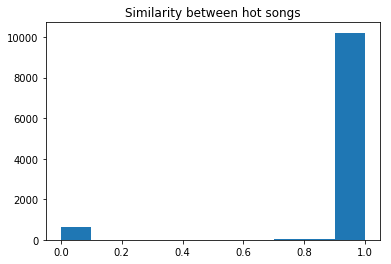

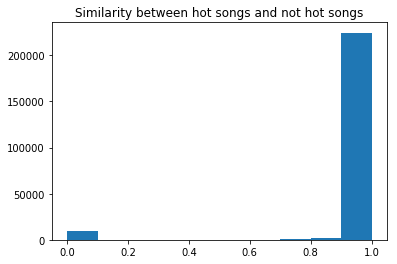

In [169]:
hotSim = np.array([hotLyricsSim[ids] for ids in hotLyricsSim])
plt.hist(hotSim)
plt.title("Similarity between hot songs")
plt.show()
plt.hist(crossSim)
plt.title("Similarity between hot songs and not hot songs")
plt.show()

In [145]:
tfidf

{'TRAAAAV128F421A322': [(1, 0.049740560064404291),
  (2, 0.024746752279134431),
  (3, 0.018869384021611712),
  (4, 0.015021590237838237),
  (5, 0.040063960898176099),
  (6, 0.020691458676461161),
  (7, 0.012064065894172093),
  (8, 0.012342985432047442),
  (11, 0.016012999033633658),
  (12, 0.023255679851041627),
  (13, 0.04107690351950731),
  (14, 0.019151067602833281),
  (15, 0.01607112676947569),
  (18, 0.040546807102298792),
  (19, 0.053526447359177991),
  (20, 0.046319648504945139),
  (21, 0.042657593535478634),
  (23, 0.078866641451343117),
  (25, 0.021605300799125482),
  (26, 0.044570624647546686),
  (28, 0.021818773760934648),
  (30, 0.026746698841725196),
  (36, 0.058509356571775431),
  (42, 0.060414122445536456),
  (45, 0.031492254826200008),
  (54, 0.072465930245431256),
  (56, 0.034975427221041931),
  (57, 0.03783198027624296),
  (68, 0.040330103166823304),
  (99, 0.047719663240038929),
  (192, 0.1279349594690101),
  (249, 0.068081942832947412),
  (264, 0.076083454579932264)

In [16]:
'''
with open("tfidfModel.pickle", 'wb') as f:
    pickle.dump(model, f)
with open("tfidfVectors.pickle", 'wb') as f:
    pickle.dump(tfidf, f)
with open("words.pickle", 'wb') as f:
    pickle.dump(words, f)
'''
with open("subsetHot.pickle", "wb") as f:
    pickle.dump(hot, f)